# Intro

It's the last time we meet in class for exercises! And to celebrate this mile-stone, I've put together an very nice little set of exercises. And if you're behind, don't worry. The workload is low!

  - Part A: First, we play around with sentiment analysis
  - That's it!


# Part A: Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



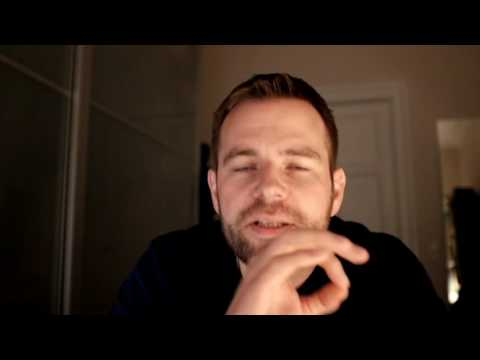

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

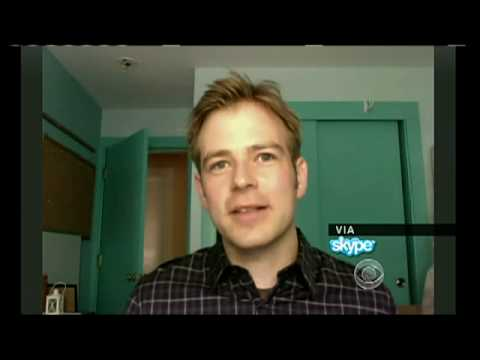

In [3]:
# There's also this one from 2010
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


*Exercise*: Sentiment distribution. 
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
> * Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
> * Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
> * Who are the 10 artists with happiest and saddest pages?

<div class="alert alert-block alert-info">
As long as you get the plots right, it's OK to use LLM help here.
</div>

*Exercise*: Community sentiment distribution. 
  
> * Last week we calculated the stuctural communities of the graph. For this exercise, we use those communities (just the 10 largest ones). Specifically, you should calculate the average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by comparing to the genres, checking out the word-clouds for each community, and reading the wiki-pages? 
> * Compare the sentiment of the happiest and saddest communities to the overall (entire network) distribution of sentiment that you calculated in the previous exercise. Are the communities very differenct from the average? Or do you find the sentiment to be quite similar across all of the communities?

<div class="alert alert-block alert-info">
As above, feel free to go nuts with help from an LLM with this exercise for the technical parts. But try to answer the questions about interpreting the results with your own human brain.
</div>

**Note**: Calculating sentiment takes a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops

In [1]:
import pandas as pd

# Path to your file (update with the actual file path)
file_path = "../data/LabMT_wordlist.txt"

# Load the data
df = pd.read_csv(file_path, sep='\s+', skiprows=2)  # Skipping first two lines for headers

# Display the DataFrame
print(df.columns)
print(df.shape)
print(df.head(5))


Index(['word', 'happiness_rank', 'happiness_average',
       'happiness_standard_deviation', 'twitter_rank', 'google_rank',
       'nyt_rank', 'lyrics_rank'],
      dtype='object')
(10222, 8)
        word  happiness_rank  happiness_average  happiness_standard_deviation  \
0   laughter               1               8.50                        0.9313   
1  happiness               2               8.44                        0.9723   
2       love               3               8.42                        1.1082   
3      happy               4               8.30                        0.9949   
4    laughed               5               8.26                        1.1572   

  twitter_rank google_rank nyt_rank lyrics_rank  
0         3600          --       --        1728  
1         1853        2458       --        1230  
2           25         317      328          23  
3           65        1372     1313         375  
4         3334        3542       --        2332  


In [2]:
import numpy as np

# Create a dictionary mapping words to their happiness scores
happiness_dict = dict(zip(df['word'], df['happiness_average']))

def calculate_sentiment(tokens):
    """
    Calculate the average happiness score for a list of tokens.
    """
    scores = [happiness_dict.get(token, 5.0) for token in tokens]  # Default to neutral score 5.0 if word not in list
    if scores:
        return np.mean(scores)
    else:
        return 0  # Return 0 if no tokens are provided


In [25]:
import networkx as nx
import nltk
from nltk.tokenize import word_tokenize
import re
import numpy as np
from tqdm import tqdm
from networkx.readwrite import json_graph
import json
import nltk
from nltk.corpus import stopwords
import string

# Load JSON data
with open(r"C:\Users\jbhan\Desktop\socialgraphs2024\data\country_musician_graph_genres_content.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert JSON data back to a NetworkX graph
G = json_graph.node_link_graph(data)

In [26]:
# Calculate sentiment for each node
sentiments = {}

for node in tqdm(G.nodes(), desc='Calculating sentiment for nodes'):
    content = G.nodes[node].get('content', '')
    tokens = content.split()
    # Calculate sentiment
    sentiment = calculate_sentiment(tokens)
    # Store sentiment as a node attribute
    G.nodes[node]['sentiment'] = sentiment
    sentiments[node] = sentiment


Calculating sentiment for nodes: 100%|██████████| 1737/1737 [00:00<00:00, 6810.57it/s]


In [27]:
import statistics

# Extract sentiment values
sentiment_values = list(sentiments.values())

# Calculate statistics
mean_sentiment = np.mean(sentiment_values)
median_sentiment = np.median(sentiment_values)
variance_sentiment = np.var(sentiment_values)
percentile_25 = np.percentile(sentiment_values, 25)
percentile_75 = np.percentile(sentiment_values, 75)

print(f"Average Sentiment: {mean_sentiment:.4f}")
print(f"Median Sentiment: {median_sentiment:.4f}")
print(f"Variance of Sentiment: {variance_sentiment:.4f}")
print(f"25th Percentile: {percentile_25:.4f}")
print(f"75th Percentile: {percentile_75:.4f}")


Average Sentiment: 5.6975
Median Sentiment: 5.6932
Variance of Sentiment: 0.0100
25th Percentile: 5.6305
75th Percentile: 5.7568


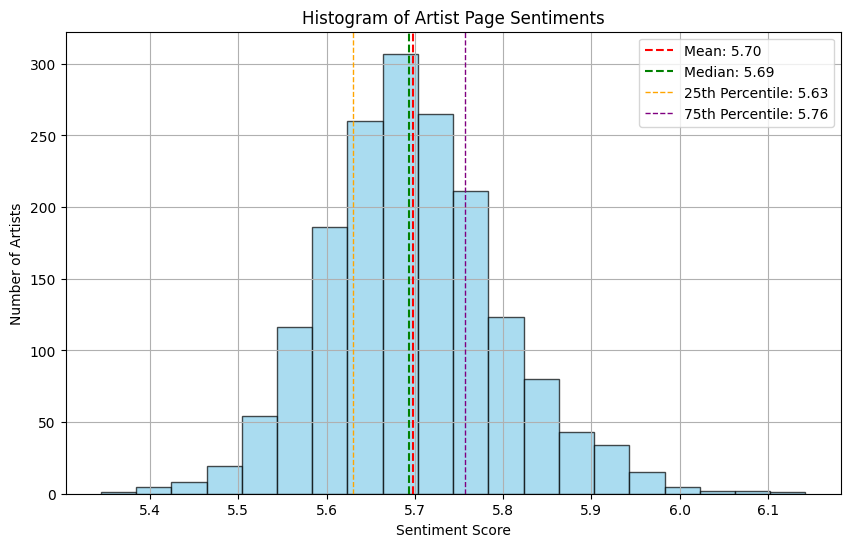

In [28]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentiment_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add mean and median lines
plt.axvline(mean_sentiment, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_sentiment:.2f}')
plt.axvline(median_sentiment, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_sentiment:.2f}')

# Add percentile lines
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75:.2f}')

plt.title('Histogram of Artist Page Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Artists')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# artists with 0 sentiment
zero_sentiment_artists = [artist for artist, sentiment in sentiments.items() if sentiment == 0]
print(f"Number of artists with 0 sentiment: {len(zero_sentiment_artists)}")

print(zero_sentiment_artists)

Number of artists with 0 sentiment: 0
[]


In [30]:
# Sort the sentiments
sorted_sentiments = sorted(sentiments.items(), key=lambda x: x[1])

# 10 Saddest Artists
saddest_artists = sorted_sentiments[:10]
print("10 Saddest Artists:")
for artist, sentiment in saddest_artists:
    print(f"{artist}: {sentiment:.4f}")

# 10 Happiest Artists
happiest_artists = sorted_sentiments[-10:]
print("\n10 Happiest Artists:")
for artist, sentiment in reversed(happiest_artists):
    print(f"{artist}: {sentiment:.4f}")


10 Saddest Artists:
Mindy_McCready: 5.3443
Carl_Belew: 5.3907
Giant_Sand: 5.3991
Johnny_Van_Zant: 5.4104
Joey_Feek: 5.4128
S-K-O: 5.4204
Tex_Williams: 5.4263
Ira_Louvin: 5.4295
David_"Stringbean"_Akeman: 5.4311
Mickie_James: 5.4442

10 Happiest Artists:
Doc_Walker: 6.1426
McAlister_Kemp: 6.0803
McKenna_Faith: 6.0641
Tara_Lyn_Hart: 6.0281
Aleyce_Simmonds: 6.0256
Raquel_Cole: 6.0166
Jessie_Farrell: 6.0052
CB30: 5.9942
The_Sunny_Cowgirls: 5.9892
Gina_Jeffreys: 5.9880


In [32]:
from collections import defaultdict


# load louvain partition
with open(r"C:\Users\jbhan\Desktop\socialgraphs2024\data\genre_louvain_partition.json", "r", encoding="utf-8") as f:
    partition = json.load(f)

# remove nodes without sentiment
nodes_to_remove = [node for node in partition if node not in sentiments]
for node in nodes_to_remove:
    partition.pop(node)

# Initialize dictionary to store sentiments per community
community_sentiments = defaultdict(list)

# Group sentiments by community
for node, community in partition.items():
    sentiment = G.nodes[node].get('sentiment', None)
    if sentiment is not None:
        community_sentiments[community].append(sentiment)

# Calculate average sentiment per community
average_community_sentiment = {}
for community, sentiments_list in community_sentiments.items():
    average_sentiment = np.mean(sentiments_list)
    average_community_sentiment[community] = average_sentiment


In [33]:
# Get the degrees of nodes
degrees = dict(G.degree())

# Initialize dictionary to store community members
community_members = defaultdict(list)

# Group nodes by community
for node, community in partition.items():
    community_members[community].append(node)

# Get top 3 nodes by degree in each community
community_names = {}
for community, members in community_members.items():
    # Sort members by degree
    sorted_members = sorted(members, key=lambda x: degrees[x], reverse=True)
    top_members = sorted_members[:3]
    community_names[community] = top_members


In [34]:
# Sort communities by average sentiment
sorted_communities = sorted(average_community_sentiment.items(), key=lambda x: x[1])

# Three Saddest Communities
saddest_communities = sorted_communities[:3]
print("Three Saddest Communities:")
for community, sentiment in saddest_communities:
    names = ', '.join(community_names[community])
    print(f"Community {community} ({names}): {sentiment:.4f}")

# Three Happiest Communities
happiest_communities = sorted_communities[-3:]
print("\nThree Happiest Communities:")
for community, sentiment in reversed(happiest_communities):
    names = ', '.join(community_names[community])
    print(f"Community {community} ({names}): {sentiment:.4f}")


Three Saddest Communities:
Community 1 (Bonnie_Tyler, Jessica_Sierra): 5.6051
Community 9 (Ilse_DeLange, Giant_Sand, The_Common_Linnets): 5.6327
Community 0 (Willie_Nelson, Waylon_Jennings, Kris_Kristofferson): 5.6543

Three Happiest Communities:
Community 10 (Catherine_Britt, Tommy_Emmanuel, Beccy_Cole): 5.8764
Community 5 (George_Canyon, Aaron_Pritchett, One_More_Girl): 5.8640
Community 8 (Sean_Hogan, Duane_Steele, Beverley_Mahood): 5.8531


In [ ]:
# Overall sentiment statistics
overall_mean = np.mean(sentiment_values)

# Compare each community's average sentiment to the overall mean
print("\nCommunity Sentiment Comparison to Overall Mean:")
for community, avg_sentiment in average_community_sentiment.items():
    difference = avg_sentiment - overall_mean
    print(f"Community {community}: Average Sentiment = {avg_sentiment:.4f}, Difference from Overall Mean = {difference:.4f}")


Community Sentiment Comparison to Overall Mean:
Community 0: Average Sentiment = 5.6543, Difference from Overall Mean = -0.0433
Community 7: Average Sentiment = 5.6621, Difference from Overall Mean = -0.0354
Community 2: Average Sentiment = 5.6868, Difference from Overall Mean = -0.0107
Community 3: Average Sentiment = 5.7335, Difference from Overall Mean = 0.0359
Community 4: Average Sentiment = 5.6950, Difference from Overall Mean = -0.0026
Community 5: Average Sentiment = 5.8640, Difference from Overall Mean = 0.1665
Community 6: Average Sentiment = 5.6883, Difference from Overall Mean = -0.0093
Community 8: Average Sentiment = 5.8531, Difference from Overall Mean = 0.1555
Community 9: Average Sentiment = 5.6327, Difference from Overall Mean = -0.0649
Community 10: Average Sentiment = 5.8764, Difference from Overall Mean = 0.1789
Community 1: Average Sentiment = 5.6051, Difference from Overall Mean = -0.0925
